# Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm    

# Setting the Dataset Path:

In [2]:
%cd C:\Musfique\Springboard Data Analytics CT\Capstone 2\Telco Customer Churn

C:\Musfique\Springboard Data Analytics CT\Capstone 2\Telco Customer Churn


# Reading the Dataset in the Notebook:

In [3]:
telco_df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploring & Cleaning the Dataset:

In [4]:
telco_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

* The 'TotalCharges' column is supposed to be numeric.

# Converting 'TotalCharges' to a Numeric Data Type:

In [5]:
telco_df.TotalCharges = pd.to_numeric(telco_df.TotalCharges, errors='coerce')
telco_df['TotalCharges'].dtypes

dtype('float64')

# Checking Missing Values in the Dataset:

In [6]:
telco_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# Removing Rows having Missing Values from the Dataset:

In [7]:
telco_df.dropna(inplace=True)
telco_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Removing 'customerID' from the Dataset

In [8]:
df_cleaned = telco_df.drop(['customerID'], axis=1)
df_cleaned.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Converting All Strings to Lowercase:

In [9]:
for item in df_cleaned.columns:
    try:
        df_cleaned[item] = df_cleaned[item].str.lower()
    except:
        print(item, "couldn't convert")
df_cleaned.head(20)

SeniorCitizen couldn't convert
tenure couldn't convert
MonthlyCharges couldn't convert
TotalCharges couldn't convert


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,female,0,yes,no,1,no,no phone service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic check,29.85,29.85,no
1,male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one year,no,mailed check,56.95,1889.50,no
2,male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed check,53.85,108.15,yes
3,male,0,no,no,45,no,no phone service,dsl,yes,no,yes,yes,no,no,one year,no,bank transfer (automatic),42.30,1840.75,no
4,female,0,no,no,2,yes,no,fiber optic,no,no,no,no,no,no,month-to-month,yes,electronic check,70.70,151.65,yes
5,female,0,no,no,8,yes,yes,fiber optic,no,no,yes,no,yes,yes,month-to-month,yes,electronic check,99.65,820.50,yes
6,male,0,no,yes,22,yes,yes,fiber optic,no,yes,no,no,yes,no,month-to-month,yes,credit card (automatic),89.10,1949.40,no
7,female,0,no,no,10,no,no phone service,dsl,yes,no,no,no,no,no,month-to-month,no,mailed check,29.75,301.90,no
8,female,0,yes,no,28,yes,yes,fiber optic,no,no,yes,yes,yes,yes,month-to-month,yes,electronic check,104.80,3046.05,yes
9,male,0,no,yes,62,yes,no,dsl,yes,yes,no,no,no,no,one year,no,bank transfer (automatic),56.15,3487.95,no


# Converting All 'yes/no' Variables to '1/0':

In [10]:
columns_to_convert = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for item in columns_to_convert:
    df_cleaned[item].replace(to_replace='yes', value=1, inplace=True)
    df_cleaned[item].replace(to_replace='no',  value=0, inplace=True)
df_cleaned.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,female,0,1,0,1,0,no phone service,dsl,no,yes,no,no,no,no,month-to-month,1,electronic check,29.85,29.85,0
1,male,0,0,0,34,1,no,dsl,yes,no,yes,no,no,no,one year,0,mailed check,56.95,1889.50,0
2,male,0,0,0,2,1,no,dsl,yes,yes,no,no,no,no,month-to-month,1,mailed check,53.85,108.15,1
3,male,0,0,0,45,0,no phone service,dsl,yes,no,yes,yes,no,no,one year,0,bank transfer (automatic),42.30,1840.75,0
4,female,0,0,0,2,1,no,fiber optic,no,no,no,no,no,no,month-to-month,1,electronic check,70.70,151.65,1


# Exploratory Data Analysis (EDA)

# Correlation Heatmap:

Text(0.5, 1.0, 'Correlation Heatmap')

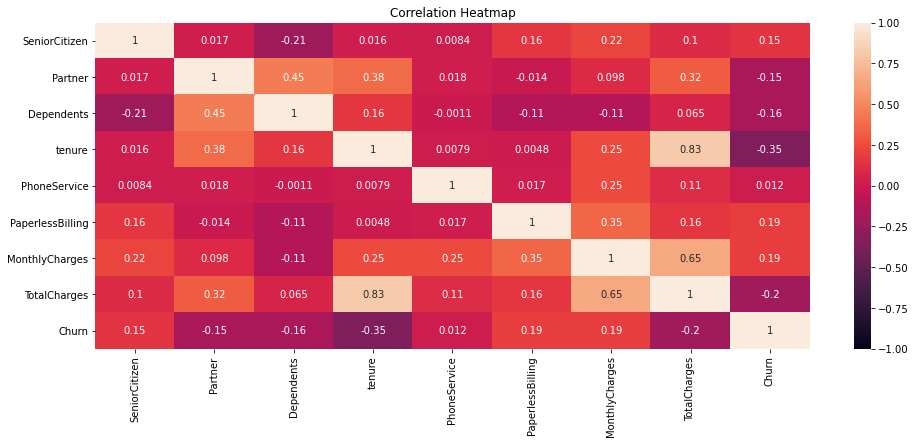

In [11]:
corr_mat = df_cleaned.corr()
plt.figure(figsize=(16, 6))
heat_map = sns.heatmap(corr_mat, vmin=-1, vmax=1, annot=True)
heat_map.set_title('Correlation Heatmap')

Insights: Churn clearly shows some correlation with all variables shown on the heatmap except phone service.

# Analyzing Binary Categorical Variables:

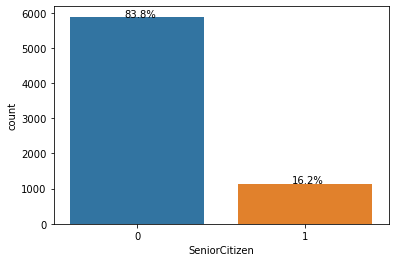

<Figure size 432x288 with 0 Axes>

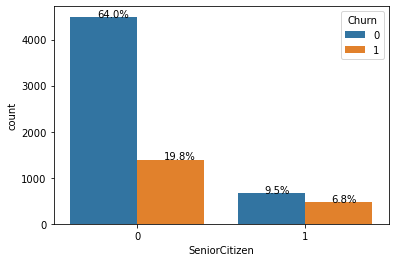

<Figure size 432x288 with 0 Axes>

In [12]:
ax = sns.countplot(x='SeniorCitizen', data=df_cleaned)
plt.figure()
#ax=sns.countplot(x='SeniorCitizen', data=df_cleaned, hue='Churn')

total = len(df_cleaned['SeniorCitizen'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2.5
        y = p.get_y() + p.get_height()+1
        ax.annotate(percentage, (x, y))
plt.show()

ax = sns.countplot(x='SeniorCitizen', data=df_cleaned, hue='Churn')
plt.figure()
#ax=sns.countplot(x='SeniorCitizen', data=df_cleaned, hue='Churn')

total = len(df_cleaned['SeniorCitizen'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2.5
        y = p.get_y() + p.get_height()+1
        ax.annotate(percentage, (x, y))
plt.show()

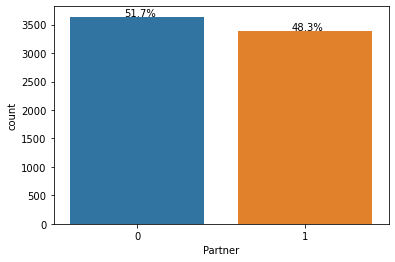

<Figure size 432x288 with 0 Axes>

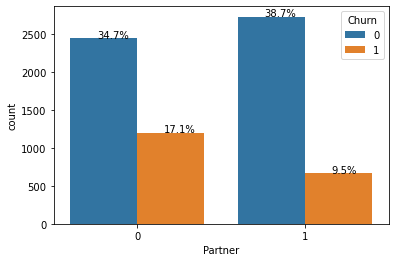

<Figure size 432x288 with 0 Axes>

In [13]:
ax = sns.countplot(x='Partner', data=df_cleaned)
plt.figure()
#ax=sns.countplot(x='SeniorCitizen', data=df_cleaned, hue='Churn')

total = len(df_cleaned['Partner'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2.5
        y = p.get_y() + p.get_height()+1
        ax.annotate(percentage, (x, y))
plt.show()

ax = sns.countplot(x='Partner', data=df_cleaned, hue='Churn')
plt.figure()
#ax=sns.countplot(x='SeniorCitizen', data=df_cleaned, hue='Churn')

total = len(df_cleaned['Partner'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2.5
        y = p.get_y() + p.get_height()+1
        ax.annotate(percentage, (x, y))
plt.show()

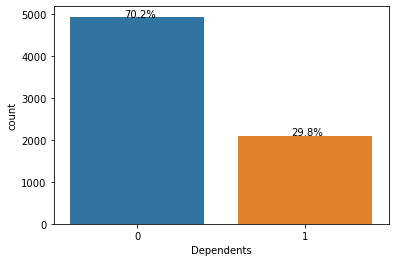

<Figure size 432x288 with 0 Axes>

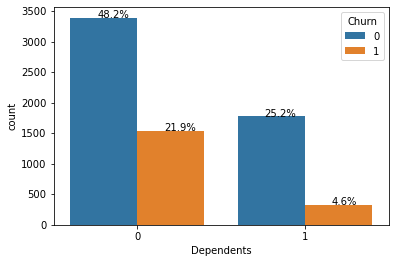

<Figure size 432x288 with 0 Axes>

In [14]:
ax = sns.countplot(x='Dependents', data=df_cleaned)
plt.figure()
#ax=sns.countplot(x='SeniorCitizen', data=df_cleaned, hue='Churn')

total = len(df_cleaned['Dependents'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2.5
        y = p.get_y() + p.get_height()+1
        ax.annotate(percentage, (x, y))
plt.show()

ax = sns.countplot(x='Dependents', data=df_cleaned, hue='Churn')
plt.figure()
#ax=sns.countplot(x='SeniorCitizen', data=df_cleaned, hue='Churn')

total = len(df_cleaned['Dependents'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2.5
        y = p.get_y() + p.get_height()+1
        ax.annotate(percentage, (x, y))
plt.show()

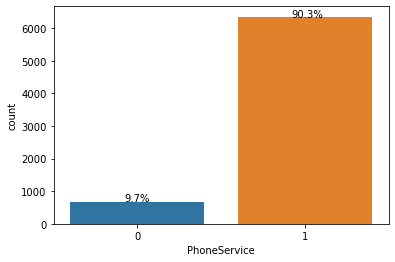

<Figure size 432x288 with 0 Axes>

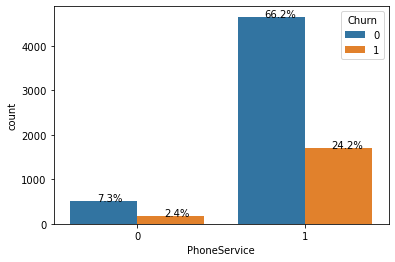

<Figure size 432x288 with 0 Axes>

In [15]:
ax = sns.countplot(x='PhoneService', data=df_cleaned)
plt.figure()
#ax=sns.countplot(x='SeniorCitizen', data=df_cleaned, hue='Churn')

total = len(df_cleaned['PhoneService'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2.5
        y = p.get_y() + p.get_height()+1
        ax.annotate(percentage, (x, y))
plt.show()

ax = sns.countplot(x='PhoneService', data=df_cleaned, hue='Churn')
plt.figure()
#ax=sns.countplot(x='SeniorCitizen', data=df_cleaned, hue='Churn')

total = len(df_cleaned['PhoneService'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2.5
        y = p.get_y() + p.get_height()+1
        ax.annotate(percentage, (x, y))
plt.show()

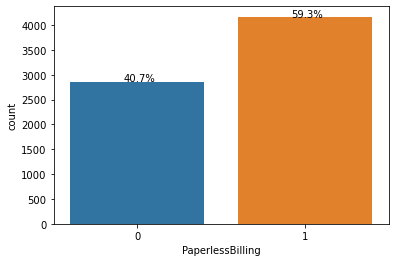

<Figure size 432x288 with 0 Axes>

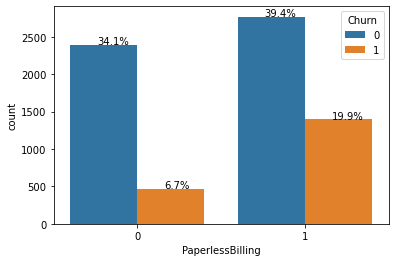

<Figure size 432x288 with 0 Axes>

In [16]:
ax = sns.countplot(x='PaperlessBilling', data=df_cleaned)
plt.figure()
#ax=sns.countplot(x='SeniorCitizen', data=df_cleaned, hue='Churn')

total = len(df_cleaned['PaperlessBilling'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2.5
        y = p.get_y() + p.get_height()+1
        ax.annotate(percentage, (x, y))
plt.show()

ax = sns.countplot(x='PaperlessBilling', data=df_cleaned, hue='Churn')
plt.figure()
#ax=sns.countplot(x='SeniorCitizen', data=df_cleaned, hue='Churn')

total = len(df_cleaned['PaperlessBilling'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2.5
        y = p.get_y() + p.get_height()+1
        ax.annotate(percentage, (x, y))
plt.show()

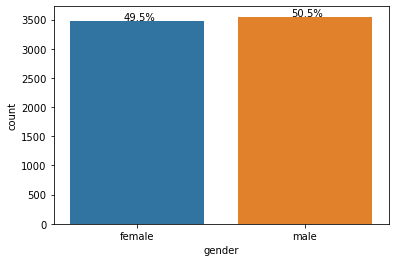

<Figure size 432x288 with 0 Axes>

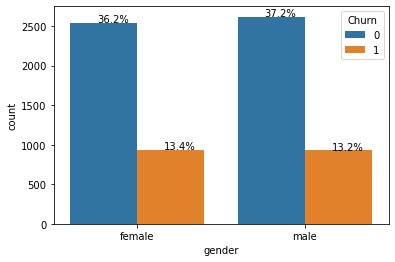

<Figure size 432x288 with 0 Axes>

In [17]:
ax = sns.countplot(x='gender', data=df_cleaned)
plt.figure()
#ax=sns.countplot(x='SeniorCitizen', data=df_cleaned, hue='Churn')

total = len(df_cleaned['gender'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2.5
        y = p.get_y() + p.get_height()+1
        ax.annotate(percentage, (x, y))
plt.show()

ax = sns.countplot(x='gender', data=df_cleaned, hue='Churn')
plt.figure()
#ax=sns.countplot(x='SeniorCitizen', data=df_cleaned, hue='Churn')

total = len(df_cleaned['gender'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2.5
        y = p.get_y() + p.get_height()+1
        ax.annotate(percentage, (x, y))
plt.show()

Insights:

1. 16.2% of the customers are seen to have churned. Churn is significantly higher in Senior Citizens (42%) compared to customers who aren't Senior Citizens (23.6%).

2. 48.3% of the customers have Partners. Churn is significantly higher in customers that don't have partners (33.1%) compared to those having Partners (19.7%).

3. 29.8% of customers have Dependents. Churn is significantly lower in customers having Dependents (15.4%) compared to those not having Dependents (31.2%).

4. 59.3% of the customers have Paperless Billing. Churn is significantly higher in customers having paperless billing (33.6%) compared to those not having Paperless Billing (16.5%).

5. 90.3% of the customers have Phone Service. Churn is not much different irrespective of customers enjoying a Phone Service (26.8%) or not (24.7%).

6. Male - Female ratio is 50.5% vs 49.5%. Churn is almost unbiased in terms of gender.

# Analyzing Other Categorical Variables:

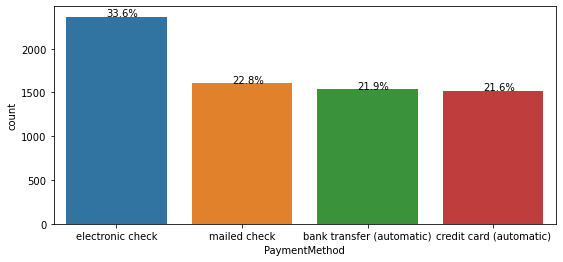

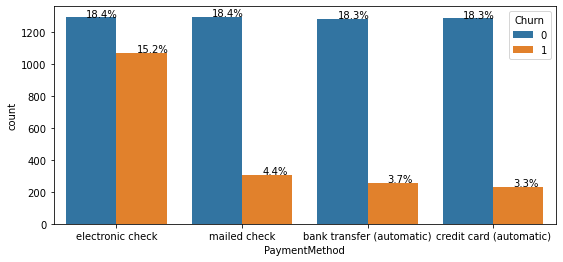

In [18]:
plt.figure(figsize=(9, 4))
ax = sns.countplot(x='PaymentMethod', data=df_cleaned)
#ax=sns.countplot(x='SeniorCitizen', data=df_cleaned, hue='Churn')

total = len(df_cleaned['PaymentMethod'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2.5
        y = p.get_y() + p.get_height()+1
        ax.annotate(percentage, (x, y))
plt.show()

plt.figure(figsize=(9, 4))
ax = sns.countplot(x='PaymentMethod', data=df_cleaned, hue='Churn')
#ax=sns.countplot(x='SeniorCitizen', data=df_cleaned, hue='Churn')

total = len(df_cleaned['PaymentMethod'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2.5
        y = p.get_y() + p.get_height()+1
        ax.annotate(percentage, (x, y))
plt.show()

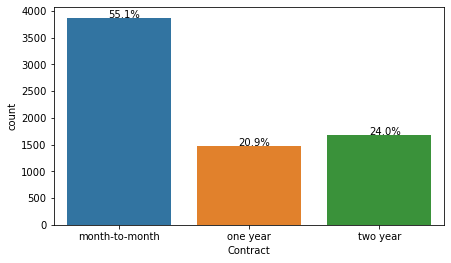

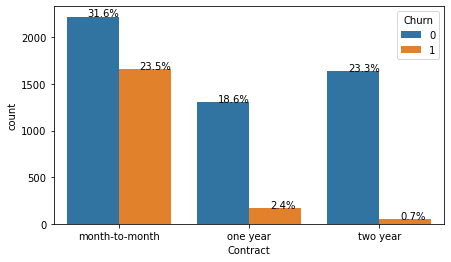

In [19]:
plt.figure(figsize=(7, 4))
ax = sns.countplot(x='Contract', data=df_cleaned)
#ax=sns.countplot(x='SeniorCitizen', data=df_cleaned, hue='Churn')

total = len(df_cleaned['Contract'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2.5
        y = p.get_y() + p.get_height()+1
        ax.annotate(percentage, (x, y))
plt.show()

plt.figure(figsize=(7, 4))
ax = sns.countplot(x='Contract', data=df_cleaned, hue='Churn')
#ax=sns.countplot(x='SeniorCitizen', data=df_cleaned, hue='Churn')

total = len(df_cleaned['Contract'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2.5
        y = p.get_y() + p.get_height()+1
        ax.annotate(percentage, (x, y))
plt.show()

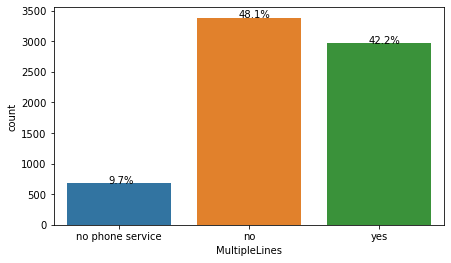

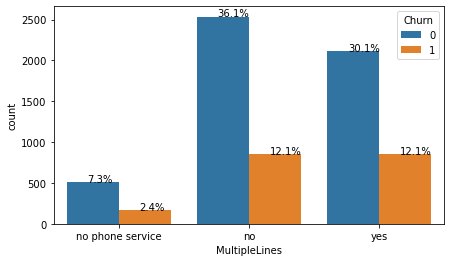

In [20]:
plt.figure(figsize=(7, 4))
ax = sns.countplot(x='MultipleLines', data=df_cleaned)
#ax=sns.countplot(x='SeniorCitizen', data=df_cleaned, hue='Churn')

total = len(df_cleaned['MultipleLines'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2.5
        y = p.get_y() + p.get_height()+1
        ax.annotate(percentage, (x, y))
plt.show()

plt.figure(figsize=(7, 4))
ax = sns.countplot(x='MultipleLines', data=df_cleaned, hue='Churn')
#ax=sns.countplot(x='SeniorCitizen', data=df_cleaned, hue='Churn')

total = len(df_cleaned['MultipleLines'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2.5
        y = p.get_y() + p.get_height()+1
        ax.annotate(percentage, (x, y))
plt.show()

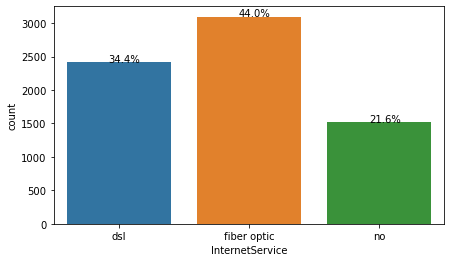

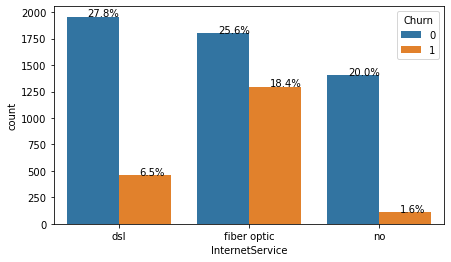

In [21]:
plt.figure(figsize=(7, 4))
ax = sns.countplot(x='InternetService', data=df_cleaned)
#ax=sns.countplot(x='SeniorCitizen', data=df_cleaned, hue='Churn')

total = len(df_cleaned['InternetService'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2.5
        y = p.get_y() + p.get_height()+1
        ax.annotate(percentage, (x, y))
plt.show()

plt.figure(figsize=(7, 4))
ax = sns.countplot(x='InternetService', data=df_cleaned, hue='Churn')
#ax=sns.countplot(x='SeniorCitizen', data=df_cleaned, hue='Churn')

total = len(df_cleaned['InternetService'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2.5
        y = p.get_y() + p.get_height()+1
        ax.annotate(percentage, (x, y))
plt.show()

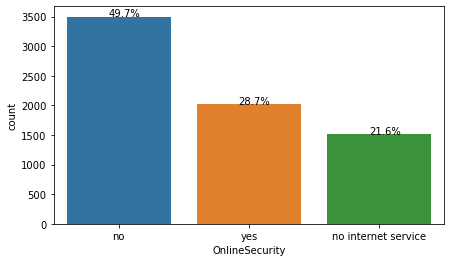

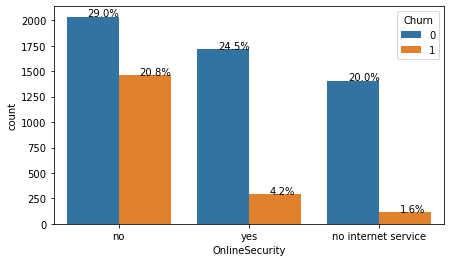

In [22]:
plt.figure(figsize=(7, 4))
ax = sns.countplot(x='OnlineSecurity', data=df_cleaned)
#ax=sns.countplot(x='SeniorCitizen', data=df_cleaned, hue='Churn')

total = len(df_cleaned['OnlineSecurity'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2.5
        y = p.get_y() + p.get_height()+1
        ax.annotate(percentage, (x, y))
plt.show()

plt.figure(figsize=(7, 4))
ax = sns.countplot(x='OnlineSecurity', data=df_cleaned, hue='Churn')
#ax=sns.countplot(x='SeniorCitizen', data=df_cleaned, hue='Churn')

total = len(df_cleaned['OnlineSecurity'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2.5
        y = p.get_y() + p.get_height()+1
        ax.annotate(percentage, (x, y))
plt.show()

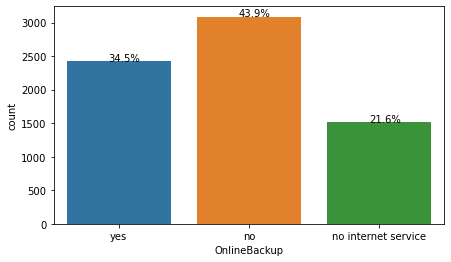

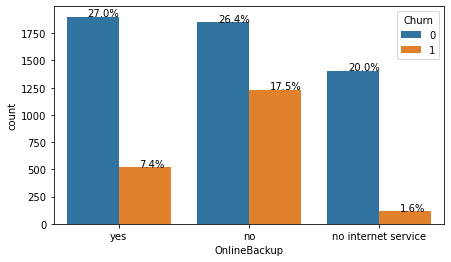

In [23]:
plt.figure(figsize=(7, 4))
ax = sns.countplot(x='OnlineBackup', data=df_cleaned)
#ax=sns.countplot(x='SeniorCitizen', data=df_cleaned, hue='Churn')

total = len(df_cleaned['OnlineBackup'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2.5
        y = p.get_y() + p.get_height()+1
        ax.annotate(percentage, (x, y))
plt.show()

plt.figure(figsize=(7, 4))
ax = sns.countplot(x='OnlineBackup', data=df_cleaned, hue='Churn')
#ax=sns.countplot(x='SeniorCitizen', data=df_cleaned, hue='Churn')

total = len(df_cleaned['OnlineBackup'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2.5
        y = p.get_y() + p.get_height()+1
        ax.annotate(percentage, (x, y))
plt.show()

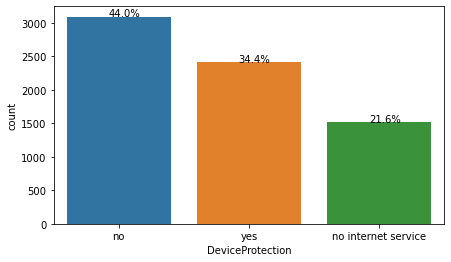

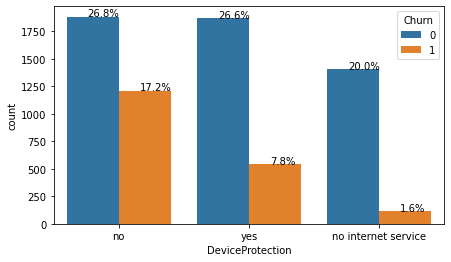

In [24]:
plt.figure(figsize=(7, 4))
ax = sns.countplot(x='DeviceProtection', data=df_cleaned)
#ax=sns.countplot(x='SeniorCitizen', data=df_cleaned, hue='Churn')

total = len(df_cleaned['DeviceProtection'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2.5
        y = p.get_y() + p.get_height()+1
        ax.annotate(percentage, (x, y))
plt.show()

plt.figure(figsize=(7, 4))
ax = sns.countplot(x='DeviceProtection', data=df_cleaned, hue='Churn')
#ax=sns.countplot(x='SeniorCitizen', data=df_cleaned, hue='Churn')

total = len(df_cleaned['DeviceProtection'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2.5
        y = p.get_y() + p.get_height()+1
        ax.annotate(percentage, (x, y))
plt.show()

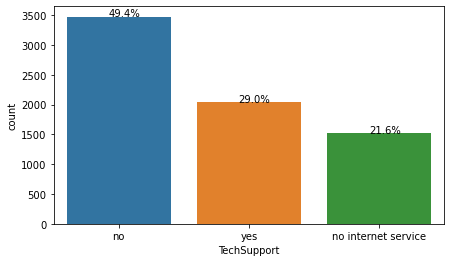

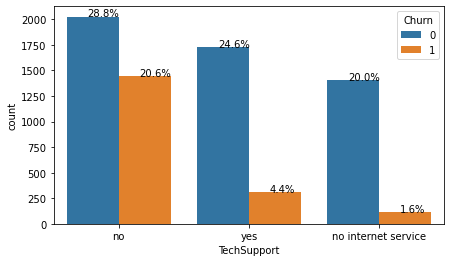

In [25]:
plt.figure(figsize=(7, 4))
ax = sns.countplot(x='TechSupport', data=df_cleaned)
#ax=sns.countplot(x='SeniorCitizen', data=df_cleaned, hue='Churn')

total = len(df_cleaned['TechSupport'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2.5
        y = p.get_y() + p.get_height()+1
        ax.annotate(percentage, (x, y))
plt.show()

plt.figure(figsize=(7, 4))
ax = sns.countplot(x='TechSupport', data=df_cleaned, hue='Churn')
#ax=sns.countplot(x='SeniorCitizen', data=df_cleaned, hue='Churn')

total = len(df_cleaned['TechSupport'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2.5
        y = p.get_y() + p.get_height()+1
        ax.annotate(percentage, (x, y))
plt.show()

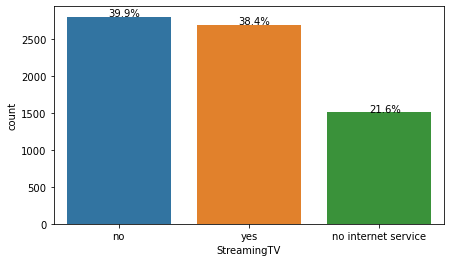

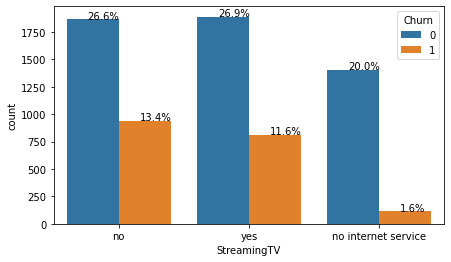

In [26]:
plt.figure(figsize=(7, 4))
ax = sns.countplot(x='StreamingTV', data=df_cleaned)
#ax=sns.countplot(x='SeniorCitizen', data=df_cleaned, hue='Churn')

total = len(df_cleaned['StreamingTV'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2.5
        y = p.get_y() + p.get_height()+1
        ax.annotate(percentage, (x, y))
plt.show()

plt.figure(figsize=(7, 4))
ax = sns.countplot(x='StreamingTV', data=df_cleaned, hue='Churn')
#ax=sns.countplot(x='SeniorCitizen', data=df_cleaned, hue='Churn')

total = len(df_cleaned['StreamingTV'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2.5
        y = p.get_y() + p.get_height()+1
        ax.annotate(percentage, (x, y))
plt.show()

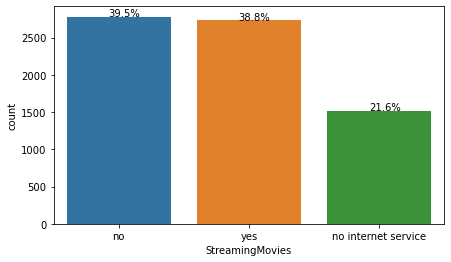

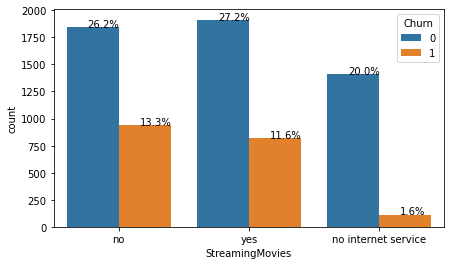

In [27]:
plt.figure(figsize=(7, 4))
ax = sns.countplot(x='StreamingMovies', data=df_cleaned)
#ax=sns.countplot(x='SeniorCitizen', data=df_cleaned, hue='Churn')

total = len(df_cleaned['StreamingMovies'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2.5
        y = p.get_y() + p.get_height()+1
        ax.annotate(percentage, (x, y))
plt.show()

plt.figure(figsize=(7, 4))
ax = sns.countplot(x='StreamingMovies', data=df_cleaned, hue='Churn')
#ax=sns.countplot(x='SeniorCitizen', data=df_cleaned, hue='Churn')

total = len(df_cleaned['StreamingMovies'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2.5
        y = p.get_y() + p.get_height()+1
        ax.annotate(percentage, (x, y))
plt.show()

Insights:

1. 33.6% customers paying through Electronic Checks. Churn is significantly higher in customers paying through electronic checks (45.2%) compared to those having other Payments Methods (15-19%).

2. 55.1% of the customers have Month-to-Month Contract. Churn is significantly higher in customers having a month-to-month contract (42.6%) compared to those having other Contracts (3-11%).

3. 9.7% of the customers don't have Phone Service. Of the 90.3% having Phone Service, 46.7% have Multiple Lines. Churn is observed to be bit lower in customers not having Multiple Lines (25.1%) compared to those having Multiple Lines (28.7%).

4. 78.4% customers have Internet Service. Higher proportion of the customers subscribed Internet Service through Fiber Optic (41.8%) have churned compared to those subscribed the service through DSL (18.9%).

5. Churn is significantly higher in customers who haven't subscribed to these serives - Online Security, Online Backup, Device Protection and Tech Support (41.9%, 39.9%, 39.1% and 41.7% respectively) compared to those who subcribed these services (14.6%, 21.4%, 22.7% and 15.2% respectively) 

5. Churn is slightly higher (less than 3%) in customers who haven't subscribed streaming TV or movies too.

# Analyzing Continuous Variables:

Plotting Distributions:

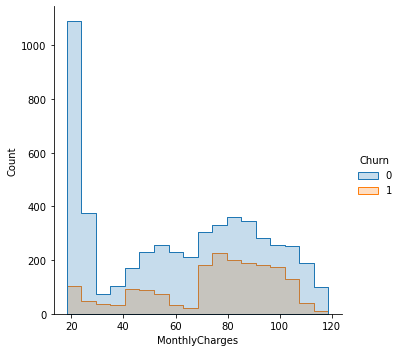

In [28]:
sns.displot(df_cleaned, x='MonthlyCharges', hue='Churn', element='step')

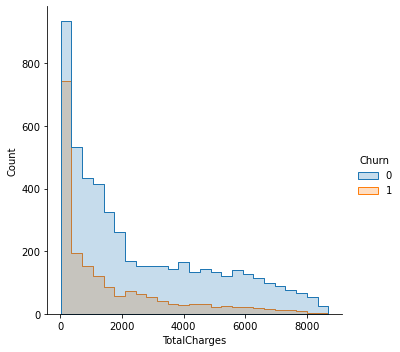

In [29]:
sns.displot(df_cleaned, x='TotalCharges', hue='Churn', element='step')

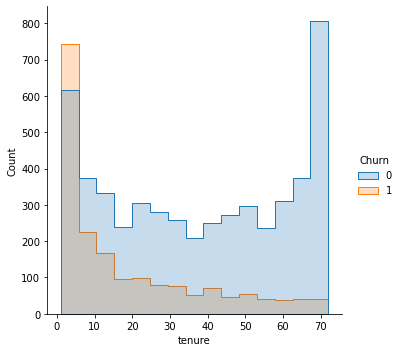

In [30]:
sns.displot(df_cleaned, x='tenure', hue='Churn', element='step')

Pair Plots:

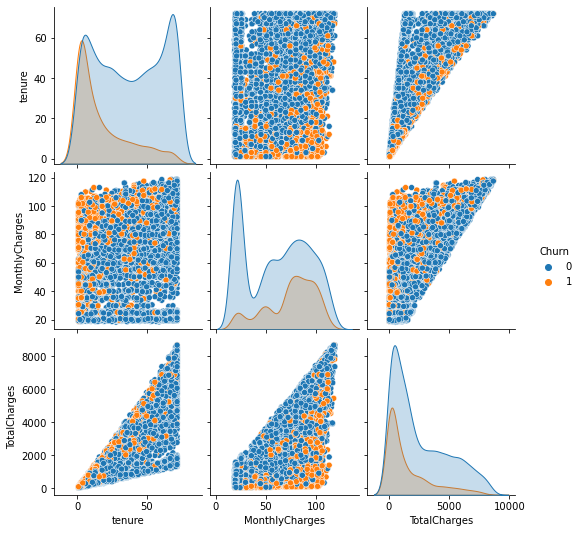

In [31]:
sns.pairplot(df_cleaned,vars = ['tenure','MonthlyCharges','TotalCharges'], hue="Churn")

Insights: 

Both distributions and pair plot confirms the following:

1. The lower the total charges and tenure, the higher the churn.

2. Churn, conversely, is higher for highers bands of monthly charges.

# Testing Logistic Regression as a Predictive Model:

Step 1: Get data

In [32]:
df_lr = df_cleaned.drop('gender', 1)
df_lr.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,no phone service,dsl,no,yes,no,no,no,no,month-to-month,1,electronic check,29.85,29.85,0
1,0,0,0,34,1,no,dsl,yes,no,yes,no,no,no,one year,0,mailed check,56.95,1889.50,0
2,0,0,0,2,1,no,dsl,yes,yes,no,no,no,no,month-to-month,1,mailed check,53.85,108.15,1
3,0,0,0,45,0,no phone service,dsl,yes,no,yes,yes,no,no,one year,0,bank transfer (automatic),42.30,1840.75,0
4,0,0,0,2,1,no,fiber optic,no,no,no,no,no,no,month-to-month,1,electronic check,70.70,151.65,1


- Since the gender is seen to remain unbiased towards churn, gender has been dropped.

Let's convert all the categorical variables into dummy variables

In [33]:
df_dummies = pd.get_dummies(df_lr)
df_dummies.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_no,...,StreamingMovies_no,StreamingMovies_no internet service,StreamingMovies_yes,Contract_month-to-month,Contract_one year,Contract_two year,PaymentMethod_bank transfer (automatic),PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
0,0,1,0,1,0,1,29.85,29.85,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,1,53.85,108.15,1,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,42.30,1840.75,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,1,70.70,151.65,1,1,...,1,0,0,1,0,0,0,0,1,0


In [34]:
X = df_dummies.drop('Churn', 1)
y = df_dummies['Churn']

In [35]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [36]:
# import the class
from sklearn.linear_model import LogisticRegression

In [37]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

In [38]:
# fit the model with data
logreg.fit(X_train,y_train)

C:\Users\mmrez\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
#
y_pred=logreg.predict(X_test)

In [40]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1180,  131],
       [ 207,  240]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

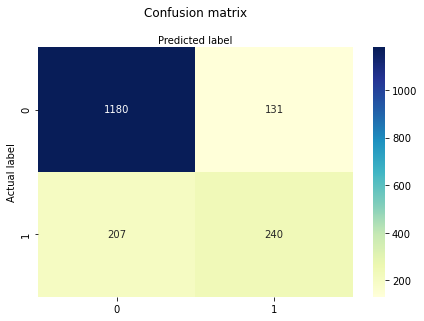

In [41]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [42]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8077360637087599
Precision: 0.6469002695417789
Recall: 0.5369127516778524


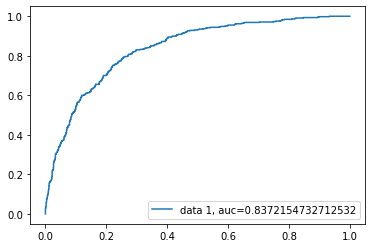

In [43]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Insights:
    
The accuracy of predicting churn using logistic regression looks quite high (80.77%).